In [1]:
#League of Legends - Data set from Kaggle

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from xgboost import XGBRFClassifier, XGBClassifier
%matplotlib inline 

In [5]:
lol = pd.read_csv(r'/Users/chinmaykrishna/Desktop/high_diamond_ranked_10min.csv')

In [6]:
#lol.head()
lol.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [7]:
lol.drop('gameId', axis=1, inplace=True)

In [8]:
lol_final = lol[['blueWins','blueWardsPlaced', 'blueWardsDestroyed', 
                'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 
                'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 
                'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
                'redWardsPlaced', 'redWardsDestroyed', 'redAssists', 
                'redDragons', 'redHeralds', 'redTowersDestroyed', 
                'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']]
lol_final.head()


,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,195,36,15,6,8,0,0,0,197,55
1,0,12,1,0,5,5,5,0,0,0,174,43,12,1,2,1,1,1,240,52
2,0,15,0,0,7,11,4,1,0,0,186,46,15,3,14,0,0,0,203,28
3,0,43,1,0,4,5,5,0,1,0,201,55,15,2,10,0,0,0,235,47
4,0,75,4,0,6,6,6,0,0,0,210,57,17,2,7,1,0,0,225,67


In [9]:
lol_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   blueWins                      9879 non-null   int64
 1   blueWardsPlaced               9879 non-null   int64
 2   blueWardsDestroyed            9879 non-null   int64
 3   blueFirstBlood                9879 non-null   int64
 4   blueKills                     9879 non-null   int64
 5   blueDeaths                    9879 non-null   int64
 6   blueAssists                   9879 non-null   int64
 7   blueDragons                   9879 non-null   int64
 8   blueHeralds                   9879 non-null   int64
 9   blueTowersDestroyed           9879 non-null   int64
 10  blueTotalMinionsKilled        9879 non-null   int64
 11  blueTotalJungleMinionsKilled  9879 non-null   int64
 12  redWardsPlaced                9879 non-null   int64
 13  redWardsDestroyed             987

In [10]:
#creatiing a heatmap function to easily visualize the heatmap for various .

def corr_heatmap(df, digits =3, cmap = 'coolwarm'):
    
    """
    df = dataframe
    cmap = color of the heat_map
    digits = number of digits for rounding off
    
    """
    # calculating the correlation matrix
    
    correlation = df.corr().round(digits)
    
    # masking the upper side of the heatmap
    
    mask = np.zeros_like(correlation)
    mask[np.triu_indices_from(mask)] = True
    
    # creating the heat map
    
    fig, ax = plt.subplots(figsize=((len(df.columns)),(len(df.columns))))
    sns.heatmap(correlation,annot=True, ax=ax, cmap=cmap, vmin=-1, vmax=1, mask = mask);
    
    return fig, ax
    
    

(<Figure size 3900x3900 with 2 Axes>, <Axes: >)

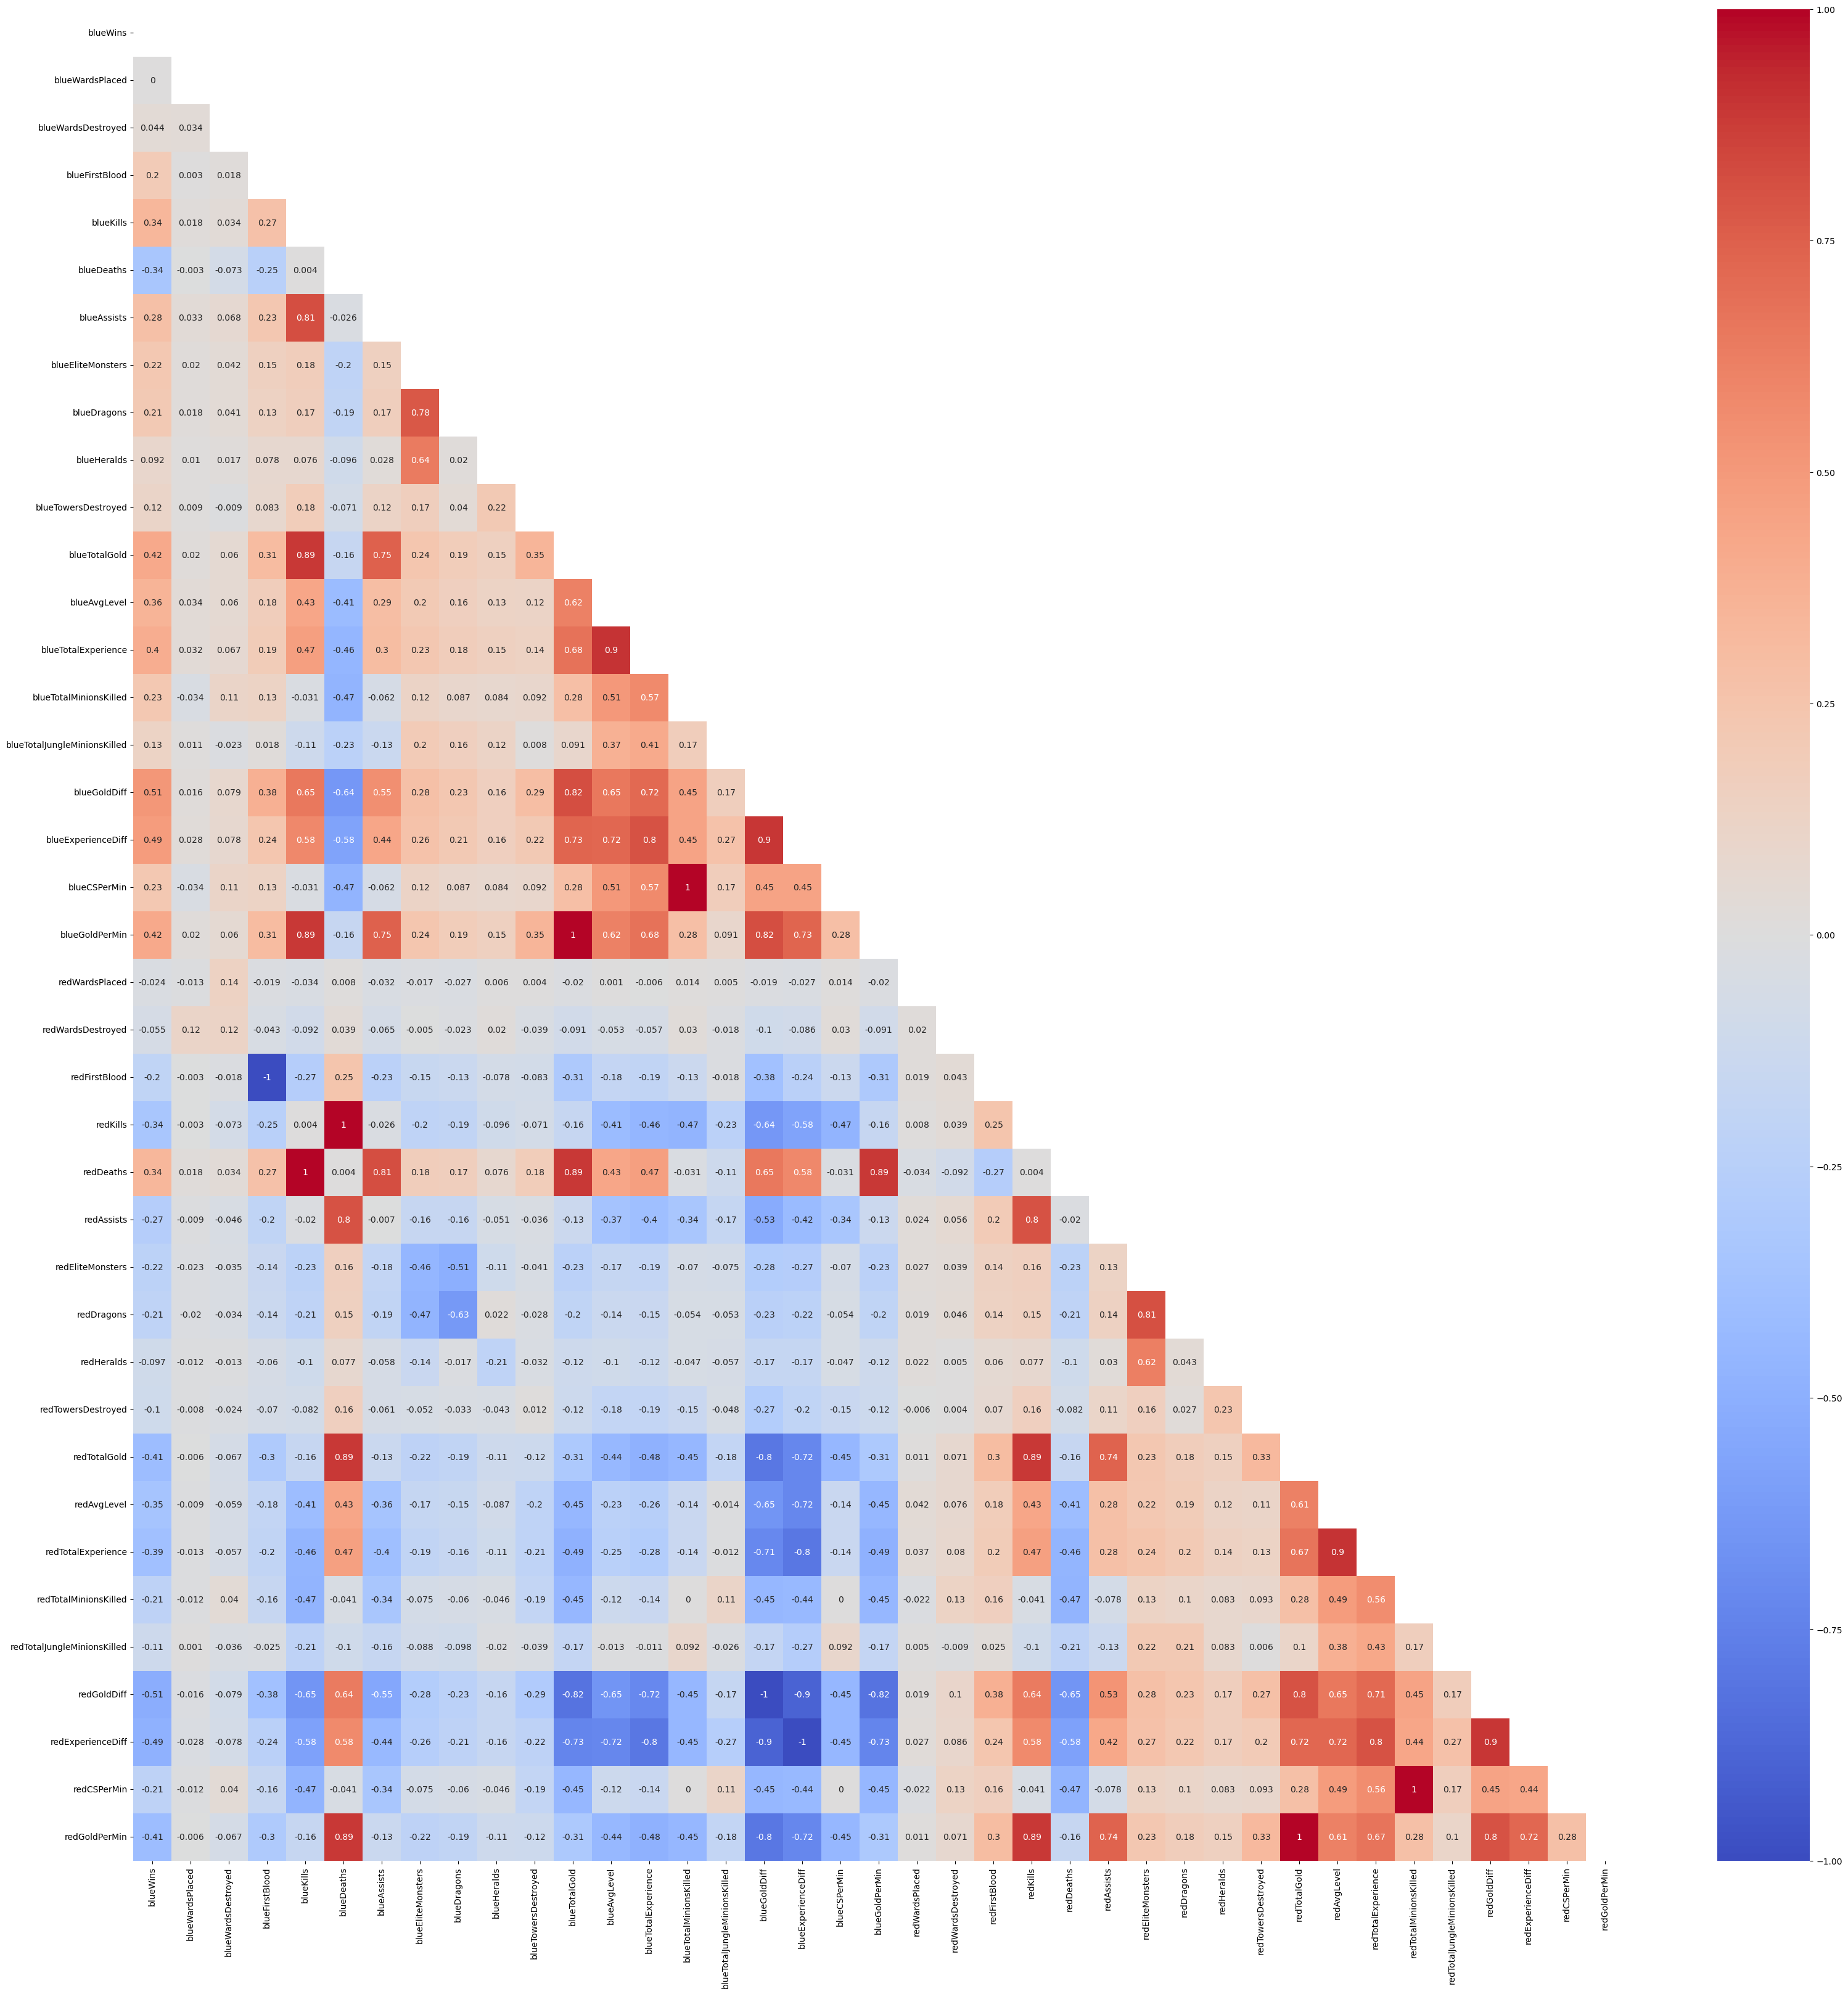

In [11]:
corr_heatmap(lol)

(<Figure size 2000x2000 with 2 Axes>, <Axes: >)

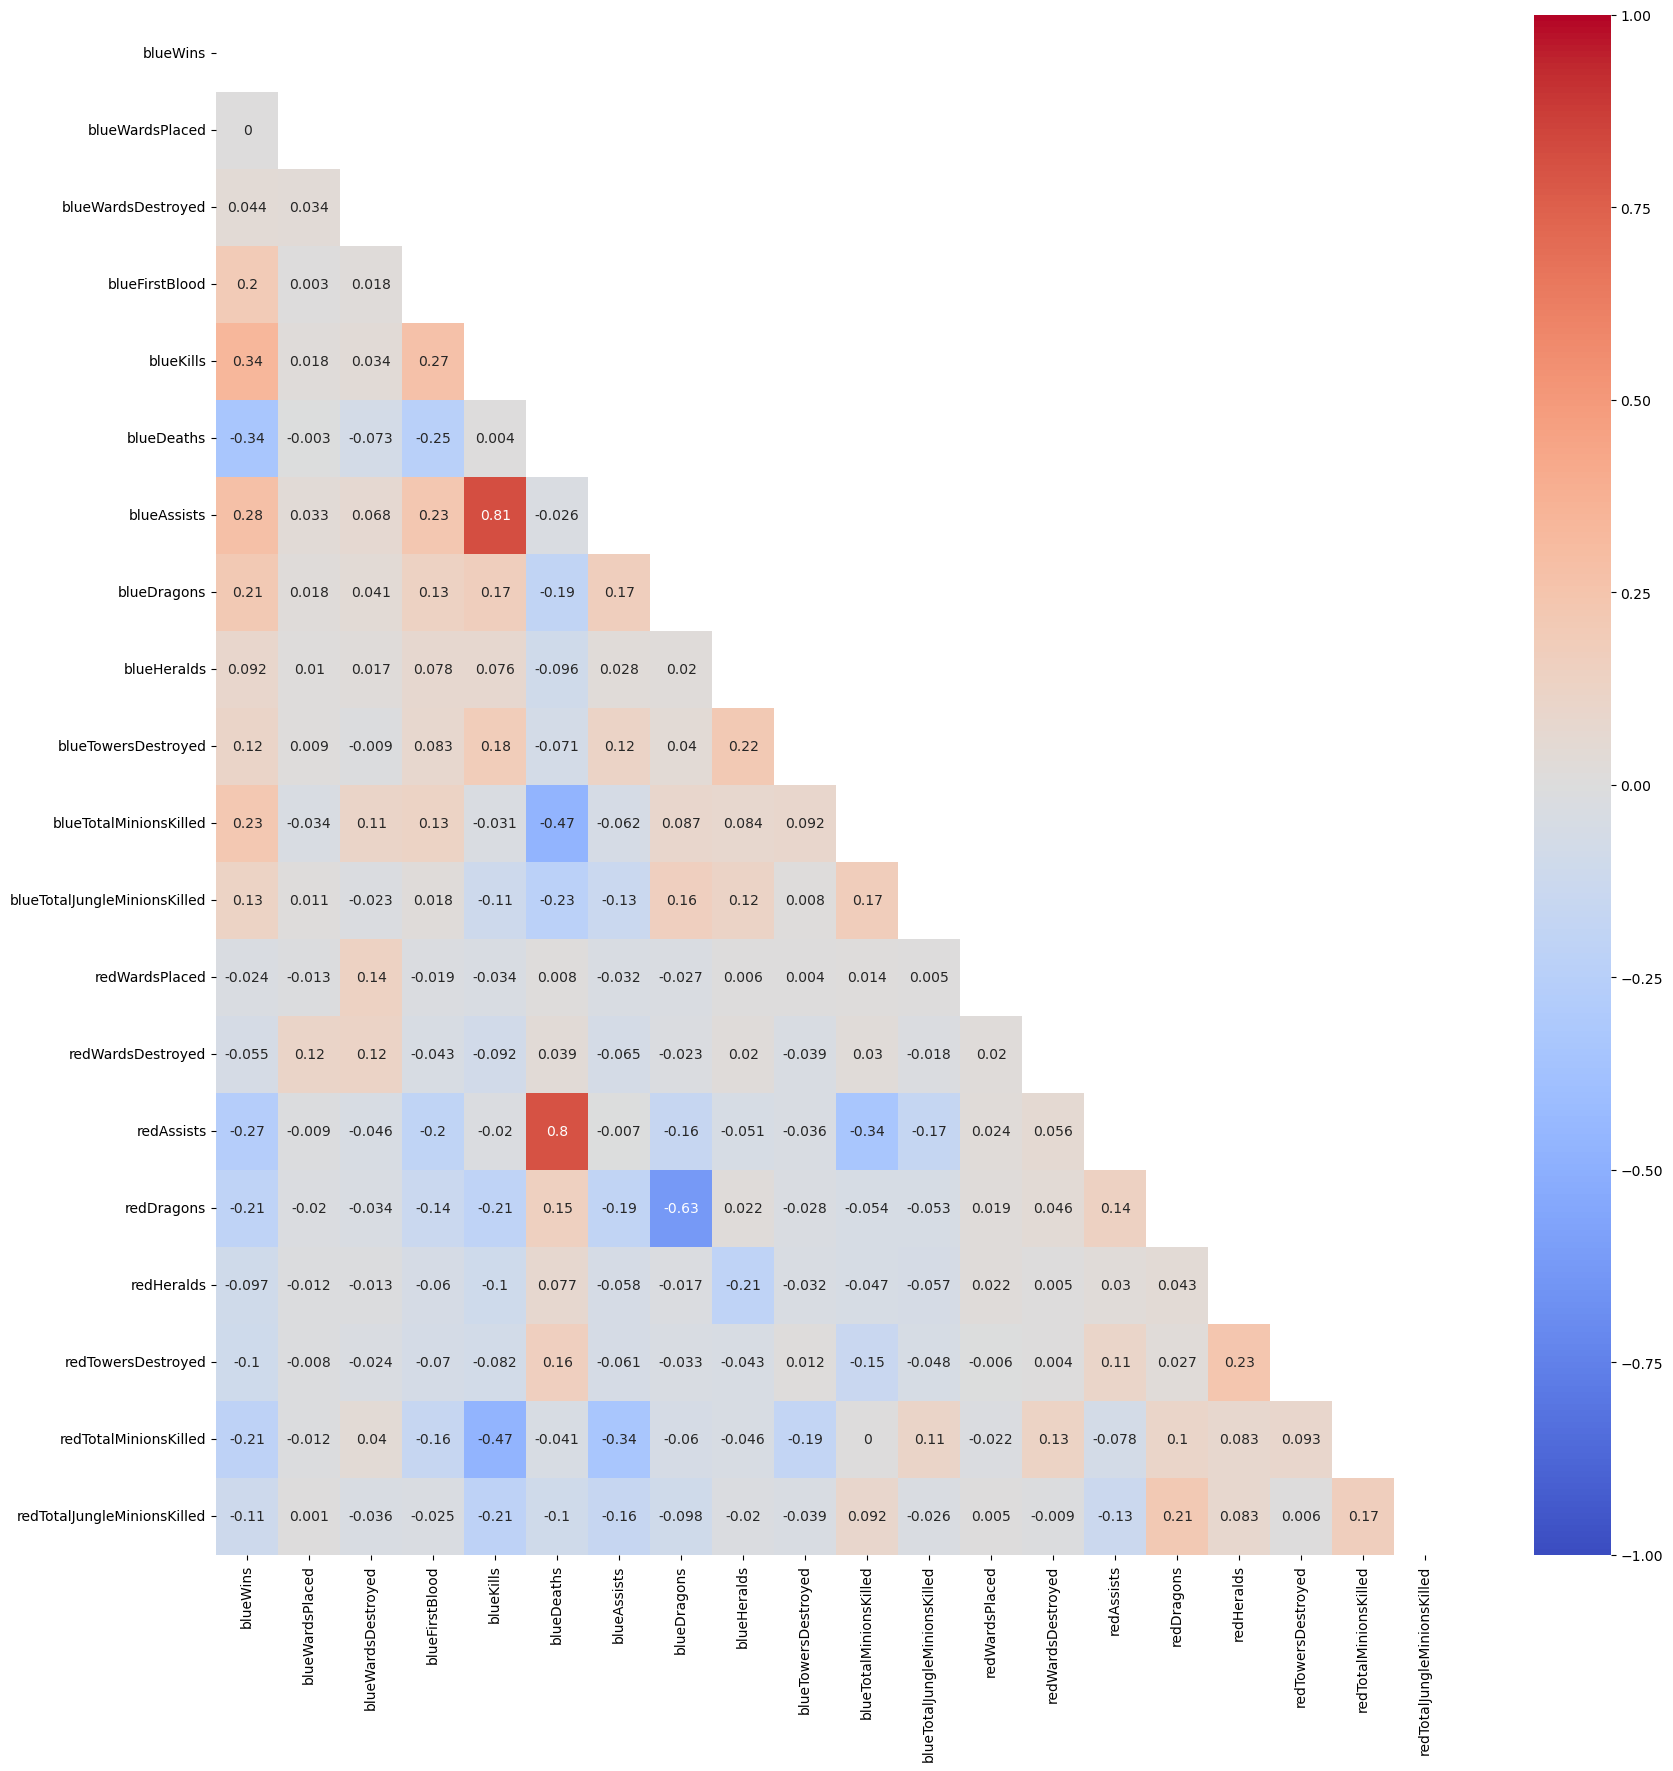

In [12]:
corr_heatmap(lol_final)
# form the heatmap it is quite evident that there is multicolinearity in the data set
# removing the respective columns redfirstkills, redeaths, redfirstblood, since the correlation coffecient is 1
# multicolinearity - dropping the columns other technique - dimensionality reduction - PCA is better when you are
# aware that the dropped varibale is important or not

In [13]:
# the present heatmap is much better, there is still correlation left among the varible but that is not perfect and

In [14]:
# creating KDE-Histigram Plot for better visualization of data - 

def visual_eda(df, target, col):
    """
    Plots a histogram + KDE, boxplot, and scatter plot with linear regression 
    line of the specified column. Use to visualize shape of data, outliers, 
    and check column's correlation with target variable.

    Args:
        df (DataFrame) : DataFrame containing column to plot
        target (str) : Name of target variable.
        col (str) : Name of the column to plot.

    Returns:
        fig : Matplotlib Figure
        gs : Matplotlib GridSpec
    """
    # Create copy variables of df and col
    data = df[col].copy()
    name = col

    # Calc mean and mean
    median = data.median()
    mean = data.mean()
    
    
    # Create gridspec for plots
    fig = plt.figure(figsize=(11, 6))
    gs = GridSpec(nrows=2, ncols=2)

    ax0 = fig.add_subplot(gs[:, 0])
   
    ax2 = fig.add_subplot(gs[:, 1])

    # Plot distribution 
    sns.histplot(data,alpha=0.5,stat='density',ax=ax0)
    sns.kdeplot(data,color='green',label='KDE',ax=ax0)
    ax0.set(ylabel='Density',title=name)
    ax0.set_title(F"Distribution of {name}")
    ax0.axvline(median,label=f'median={median:,}',color='black')
    ax0.axvline(mean,label=f'mean={mean:,}',color='black',ls=':')
    ax0.legend()


    # Plot Scatterplot to illustrate linearity
    sns.regplot(data=df, x=col, y=target, line_kws={"color": "red"}, ax=ax2)
    ax2.set_title(F"Scatter Plot of {name}")

    # Tweak Layout & Display
    fig.tight_layout()

   
    return fig, gs

(<Figure size 1100x600 with 2 Axes>, GridSpec(2, 2))

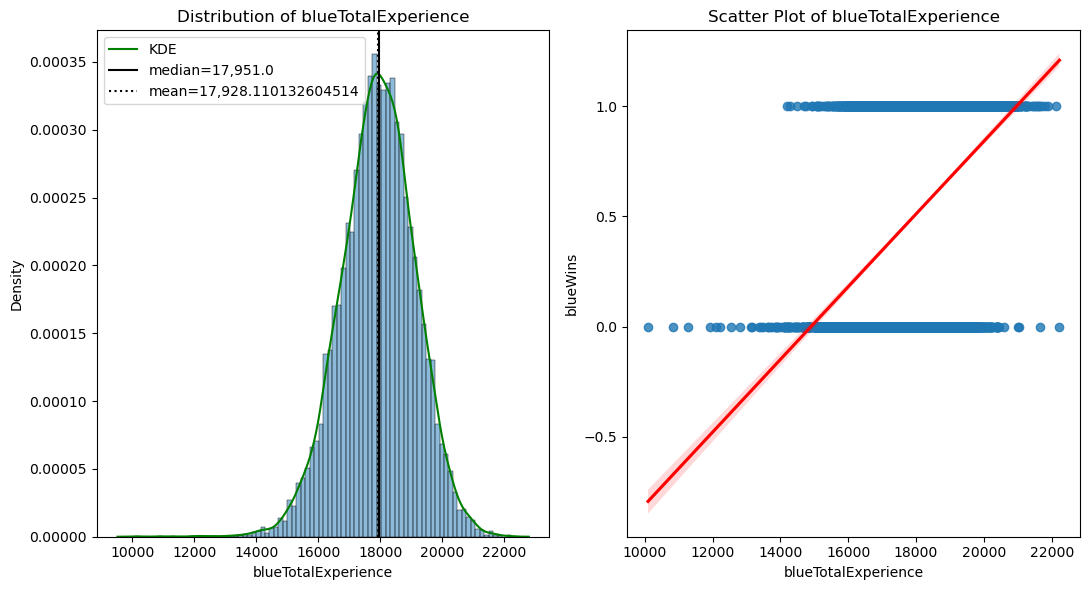

In [15]:
visual_eda(lol, 'blueWins', 'blueTotalExperience')

In [16]:
def box_plot(df, x):
    """""
    two arguments
    df = datafarme
    x = column name
    
    output = boxplot of the desired column from desired dataframe
    
    """""
    y = df[x]
    
    fig = sns.boxplot(data = y, orient = "h")
    # the orient arg make the box plot as horizontal instead of default Vertical Option
    
    return fig

<Axes: >

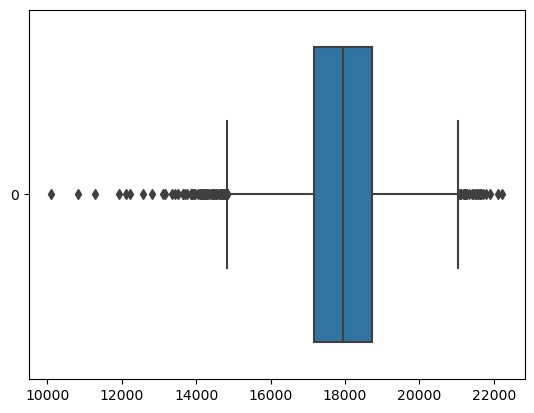

In [17]:
box_plot(lol,'blueTotalExperience')

(<Figure size 1100x600 with 2 Axes>, GridSpec(2, 2))

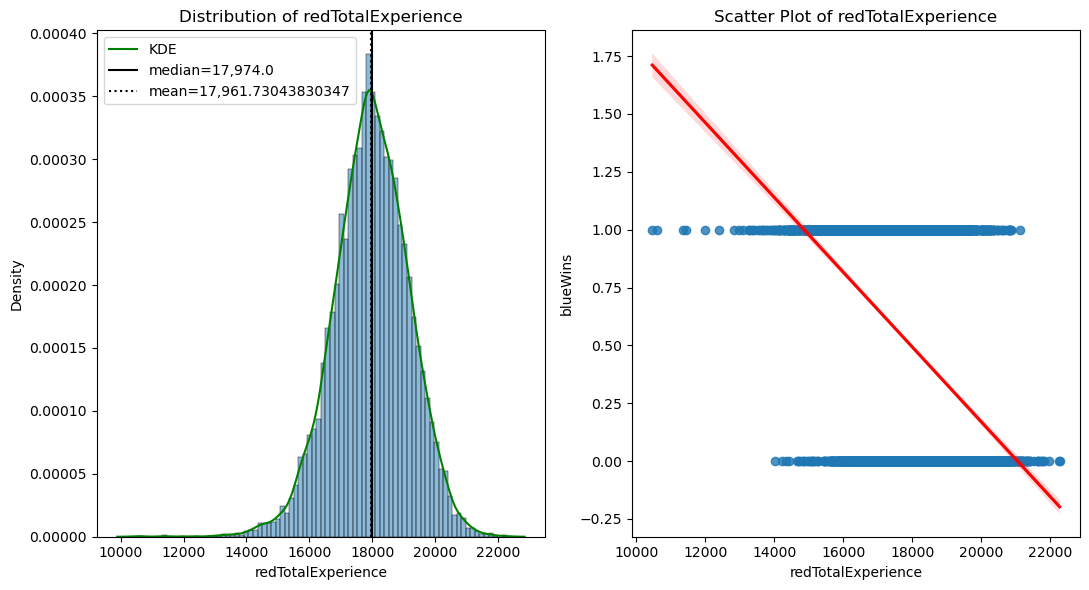

In [18]:
visual_eda(lol, 'blueWins', 'redTotalExperience')

<Axes: >

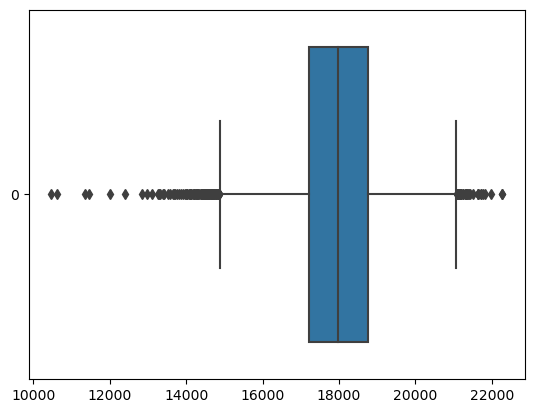

In [19]:
 box_plot(lol,'redTotalExperience')

(<Figure size 1100x600 with 2 Axes>, GridSpec(2, 2))

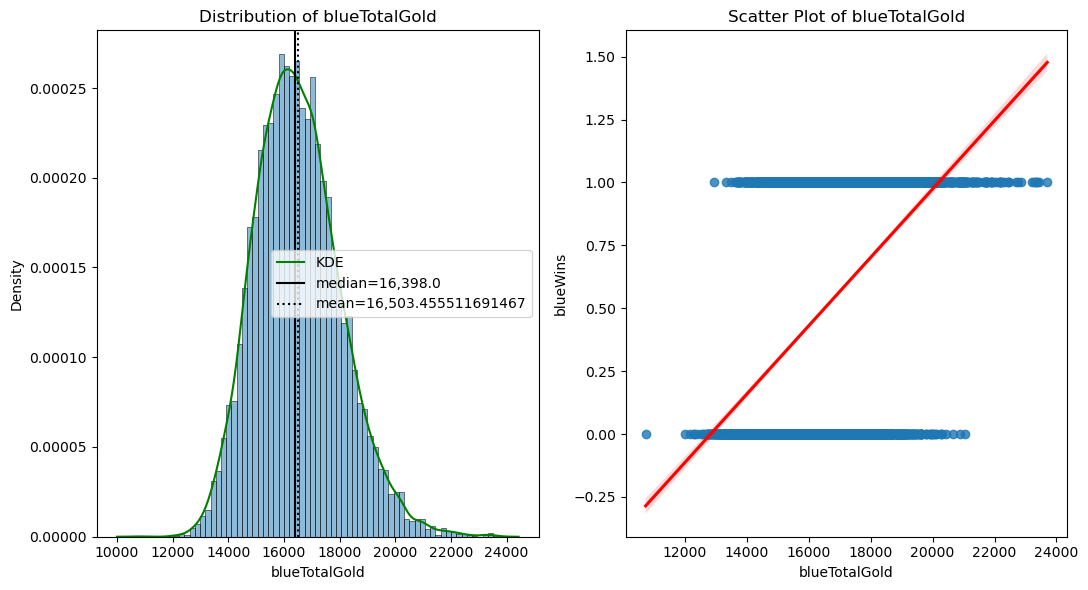

In [20]:
visual_eda(lol, 'blueWins', 'blueTotalGold')

<Axes: >

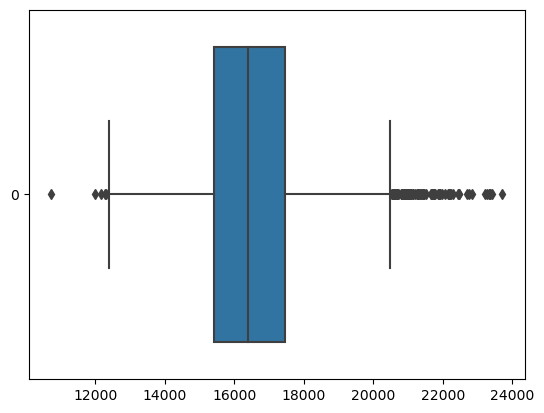

In [21]:
 box_plot(lol,'blueTotalGold')

(<Figure size 1100x600 with 2 Axes>, GridSpec(2, 2))

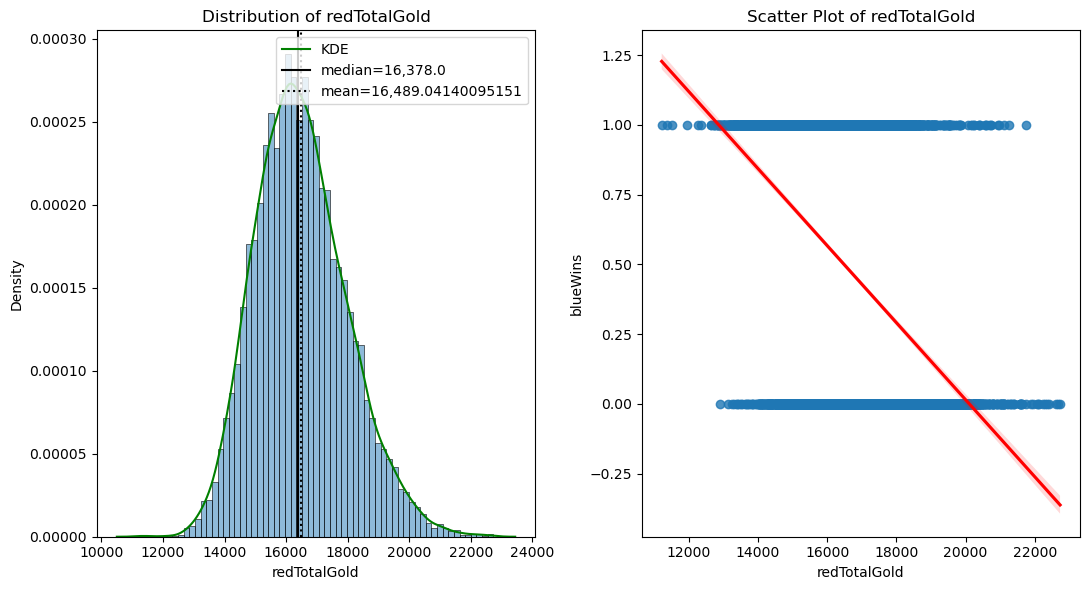

In [22]:
visual_eda(lol, 'blueWins', 'redTotalGold')

<Axes: >

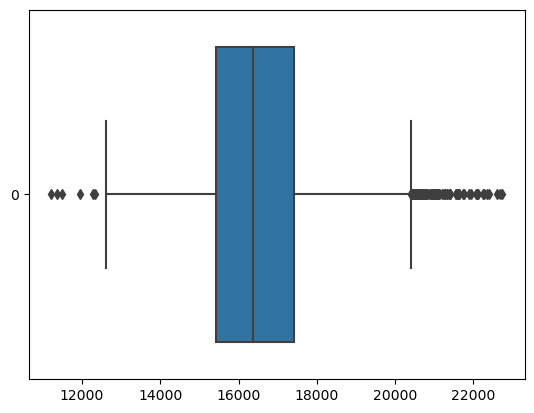

In [23]:
 box_plot(lol,'redTotalGold')

# model selection and fitting the data

In [92]:
# creating a function for the evalution of the model.

def evalute_model(model, X_train, y_train, X_test, y_test,digits=4, figsize=(10,5), params=False):
    """
    define the arguments - 
    
    model : what model to run
    
    """
    
    #predict the model
    
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    

    # Classification Report / Scores
    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    
    print(metrics.classification_report(y_train,y_hat_train, digits=digits))
    

    print("****CLASSIFICATION REPORT - TEST DATA****")
    
    print(metrics.classification_report(y_test,y_hat_test, digits=digits))
    
    fig, axes = plt.subplots(ncols = 2, figsize = figsize)
    

    ########
    
    # confusion matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap='Purples', ax=axes[0])
    axes[0].set_title('Confusion Matrix')

    # Plot ROC Curve
    roc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=axes[1])
    axes[1].plot([0, 1], [0, 1], linestyle='-', color='red')  # Diagonal line

    # Customizing the ROC curve plot
    axes[1].grid()
    axes[1].set_title('ROC AUC Curve')

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()
    
    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)
        
    

In [88]:
# creating a definiton for fitting the model, we call our model evalution function with this only

def model_fit(model,X_train, y_train, X_test, y_test, digits=4, 
             figsize=(10,5), params=False):
    
    # fit the model
    
    model.fit(X_train, y_train)
    
    # calling our evalute function 
    
    evalute_model(model,X_train, y_train, X_test, y_test, digits=digits, 
                   figsize=figsize, params=params)
    
    return model

        

In [89]:
# we also need a function for scaling as well

def split_scale(df, target, scaler=StandardScaler()):
    
    
    # Separate X and y
    target = target
    y = df[target]
    X = df.drop(target, axis=1)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    # Get list of column names
    cols = X_train.columns
    
    # Scale columns
    scaler = scaler
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)
    
    return X_train, X_test, y_train, y_test
    
    

# running the logistic regression first:

In [90]:
# splitting the data first and scaling
# note we are using our filtered dataframe i.e. lol_final
X_train_select, X_test_select, y_train_select, y_test_select = split_scale(lol_final, 'blueWins')

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7206    0.7258    0.7232      3713
           1     0.7225    0.7173    0.7199      3696

    accuracy                         0.7216      7409
   macro avg     0.7216    0.7215    0.7215      7409
weighted avg     0.7216    0.7216    0.7215      7409

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7262    0.7298    0.7280      1236
           1     0.7280    0.7245    0.7262      1234

    accuracy                         0.7271      2470
   macro avg     0.7271    0.7271    0.7271      2470
weighted avg     0.7271    0.7271    0.7271      2470



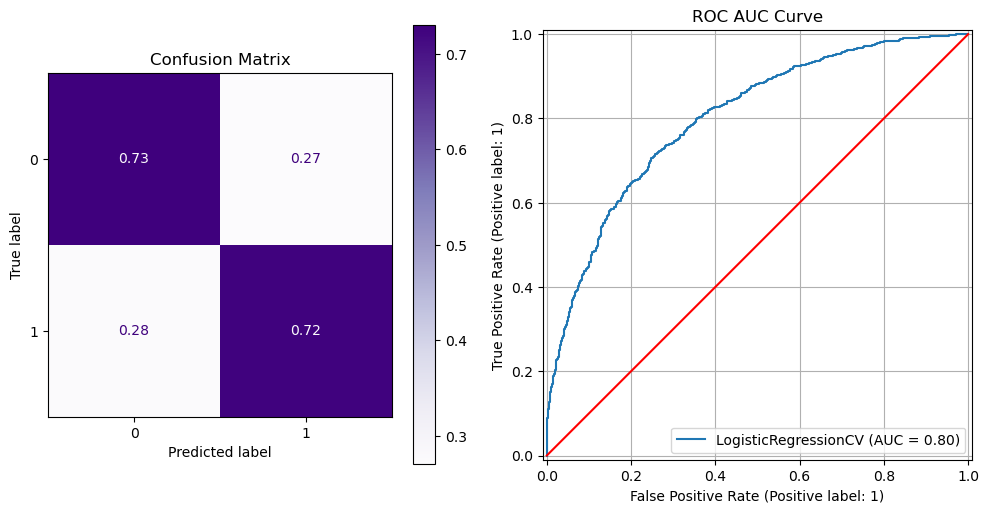

In [91]:
#running the model - name log_final
log_final = model_fit(LogisticRegressionCV(random_state=42), \
                      X_train_select, y_train_select, \
                      X_test_select, y_test_select)